In [ ]:
pip install --upgrade pandas

In [ ]:
pip install yfinance

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

# **Association of Random Variables**

In [ ]:
# load csv file
from google.colab import files
data = files.upload()

In [ ]:
# load csv
housing = pd.read_csv('Files/home/jovyan/work/data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [ ]:
# Quantifying association of covariance
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [ ]:
# Quantifying the association of correlation
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


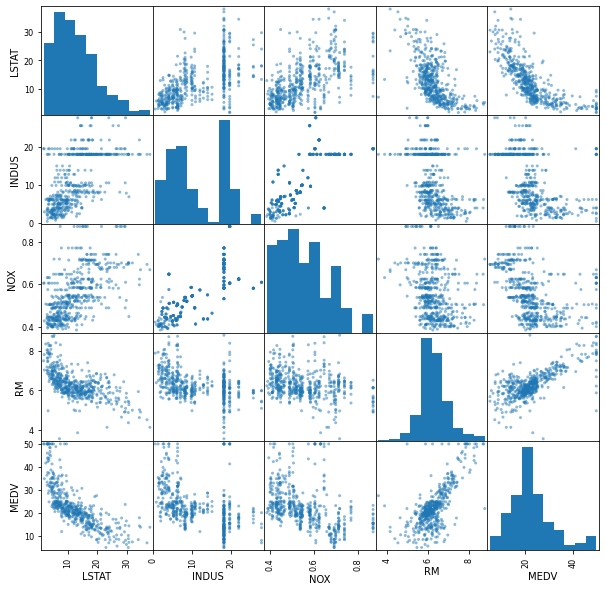

In [ ]:
# Visualise the association betweenn two variables
sm = scatter_matrix(housing, figsize=(10,10))

# **Simple Linear Regression Model**

In [ ]:
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1*housing['LSTAT']

In [ ]:
housing['observedError'] = housing['MEDV'] - housing['GuessResponse']
indices = [7, 20, 100]
print(housing['observedError'].loc[indices])

7     -12.20
20    -29.44
100     7.66
Name: observedError, dtype: float64


In [ ]:
print('Sum of squared error(SSE) is',(housing['observedError']**2).sum())

Sum of squared error(SSE) is 250794.1372


In [ ]:
# Estimate model parameters with statsmodels
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV~LSTAT', data=housing).fit()

b_0 = model.params[0]
b_1 = model.params[1]
housing['BestResponse'] = b_0 + b_1*housing['LSTAT']
housing['error'] = housing['MEDV'] - housing['BestResponse']

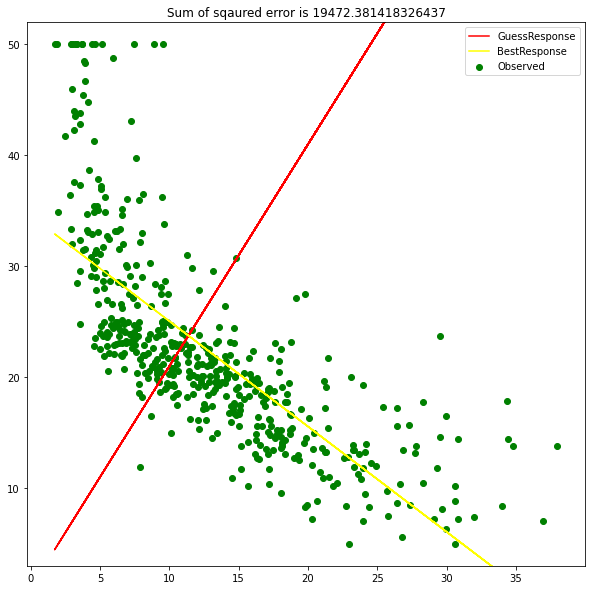

In [ ]:
# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['LSTAT'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['LSTAT'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['LSTAT'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['LSTAT'].min()-2, housing['LSTAT'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

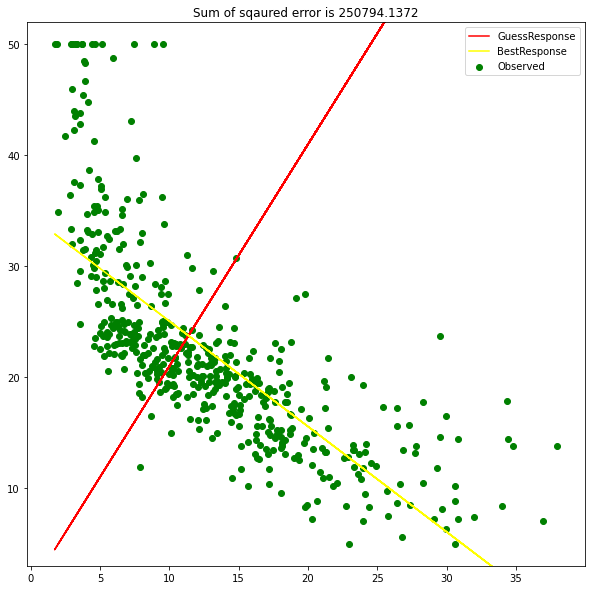

In [ ]:
# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['observedError'])**2)).sum()))
plt.scatter(housing['LSTAT'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['LSTAT'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['LSTAT'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['LSTAT'].min()-2, housing['LSTAT'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        12:28:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Diagnostic of Linear Regression Model**

### Assumptions of Linear Regreesion Models
1. Linearity
2. Independence
3. Normality
4. Equal Variance

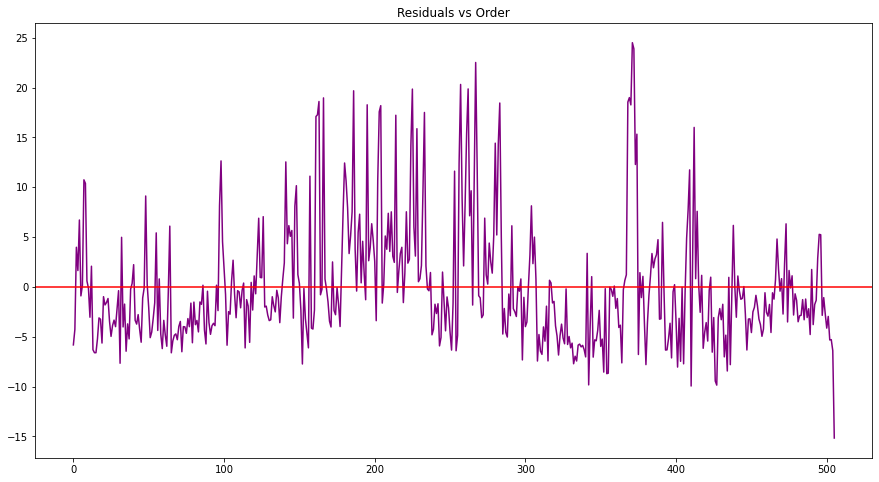

In [ ]:
# Independence
housing['error'] = housing['MEDV'] - housing['BestResponse']
plt.figure(figsize=(15,8))
plt.title('Residuals vs Order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

#### Durbin Watson test for serial correlation (Independence):
d < 1.5 : Errors are positively correlated <br>
1.5 < d < 2.5 : Errors are Normal <br>
d > 2.5 : Errors are Negatively correlated

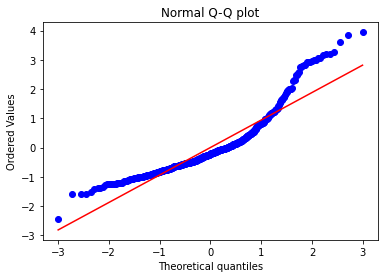

In [ ]:
# Normality
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

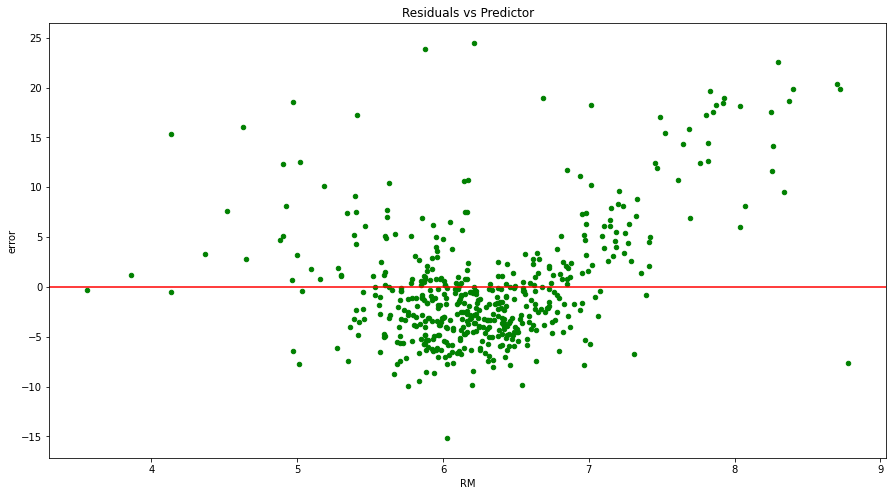

In [ ]:
# Equal Variance
housing.plot(kind='scatter', x='RM', y='error', figsize=(15,8), color='green')
plt.title('Residuals vs Predictor')
plt.axhline(y=0, color='red')
plt.show()

# **Multiple Linear Regression Model**

In [ ]:
# Data Loading
aord = pd.DataFrame(yf.download('^AORD', start='2000-01-01', end='2023-01-01')) # All Ordinaries

nikkei = pd.DataFrame(yf.download('^N225', start='2000-01-01', end='2023-01-01')) # Nikkei
hsi = pd.DataFrame(yf.download('^HSI', start='2000-01-01', end='2023-01-01')) # hsi

daxi = pd.DataFrame(yf.download('^GDAXI', start='2000-01-01', end='2023-01-01')) # dax performance index
cac40 = pd.DataFrame(yf.download('^FCHI', start='2000-01-01', end='2023-01-01')) # cac40 index 

sp500 = pd.DataFrame(yf.download('^GSPC', start='2000-01-01', end='2023-01-01')) # S&P 500
dji = pd.DataFrame(yf.download('^DJI', start='2000-01-01', end='2023-01-01')) # Dow Jones Industrial Average index
nas = pd.DataFrame(yf.download('^IXIC', start='2000-01-01', end='2023-01-01')) # NASDAQ
spy = pd.DataFrame(yf.download('SPY', start='2000-01-01', end='2023-01-01')) # SPY

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,95.308807,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,91.581657,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,91.745483,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,90.270950,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,95.513626,8066500


In [ ]:
# Data Munging
indicepanel = pd.DataFrame(index=spy.index)
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['nas'] = nas['Open'] - nas['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)

indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']

indicepanel['Price'] = spy['Open']

In [ ]:
indicepanel.head()

,spy,spy_lag1,sp500,nas,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2000-01-03,-4.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.931641,NaN,148.25000
2000-01-04,-3.59375,-4.71875,-14.030029,-166.189941,-152.099609,-102.149902,-214.479980,-28.399902,-230.179688,65.410156,143.53125
2000-01-05,-0.31250,-3.59375,-55.799927,-165.649902,-360.379883,-400.399902,-161.390137,-73.200195,-761.831055,-460.958984,139.93750
2000-01-06,0.68750,-0.31250,2.689941,-19.910156,124.000000,-35.899902,-84.399902,-20.799805,-788.839844,-405.740234,139.62500
2000-01-07,5.93750,0.68750,1.339966,-123.349854,133.689453,-62.050293,-11.510254,14.399902,76.290039,-0.640625,140.31250


In [ ]:
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [ ]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nas         0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [ ]:
indicepanel.to_csv('Files/home/jovyan/work/data/indice/indicepanel.csv')

In [ ]:
indicepanel.shape

(5786, 11)

In [ ]:
# Data Splitting
Train = indicepanel.iloc[-5000:-2500, :]
Test = indicepanel.iloc[-2500: , :]
print(Train.shape, Test.shape)

(2500, 11) (2500, 11)


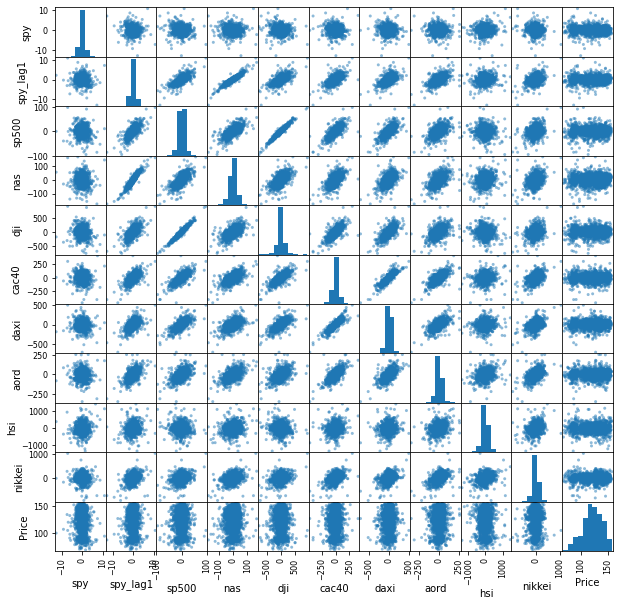

In [ ]:
# Exploration on Train data
sm = scatter_matrix(Train, figsize=(10,10))

In [ ]:
Train.iloc[:, :-1].corr()['spy']

spy         1.000000
spy_lag1   -0.061721
sp500      -0.078400
nas        -0.043887
dji        -0.073521
cac40      -0.041112
daxi       -0.045951
aord       -0.017118
hsi         0.079605
nikkei     -0.062316
Name: spy, dtype: float64

In [ ]:
formula = 'spy~spy_lag1+sp500+nas+dji+cac40+daxi+aord+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.715
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           7.03e-08
Time:                        10:31:28   Log-Likelihood:                -4355.7
No. Observations:                2500   AIC:                             8731.
Df Residuals:                    2490   BIC:                             8790.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0265      0.028      0.953      0.341      -0.028       0.081
spy_lag1      -0.1290      0.060     -2.163      0.031      -0.246      -0.012
sp500         -0.0200      0.010     -2.000      0.046      -0.040      -0.000
nas            0.0058      0.003      2.045      0.041       0.000       0.011
dji            0.0015      0.001      1.470      0.142      -0.000       0.003
cac40          0.0014      0.001      1.234      0.217      -0.001       0.004
daxi          -0.0007      0.001     -0.908      0.364      -0.002       0.001
aord           0.0009      0.001      0.993      0.321      -0.001       0.003
nikkei        -0.0009      0.000     -3.686      0.000      -0.001      -0.000
hsi            0.0006      0.000      4.162      0.000       0.000       0.001
==============================================================================
Omnibus:                      477.108   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6288.993
Skew:                          -0.505   Prob(JB):                         0.00
Kurtosis:                      10.704   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# by process of eliminination, the new formula is:
formula = 'spy~spy_lag1+sp500+nas'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

In [ ]:
# Multicollinearity
Train.iloc[:, :-1].corr()

,spy,spy_lag1,sp500,nas,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY,yhat,Order,Profit,Wealth,Return,Peak
spy,1.000000,-0.061721,-0.078400,-0.043887,-0.073521,-0.041112,-0.045951,-0.017118,0.079605,-0.062316,-0.043492,0.089387,0.089387,0.024696,0.313417,0.003942,0.310308,0.001312
spy_lag1,-0.061721,1.000000,0.736962,0.934514,0.653094,0.619802,0.538735,0.535783,0.151015,0.323822,0.035169,-0.690492,-0.690492,-0.418012,-0.083139,0.000122,-0.080862,0.001185
sp500,-0.078400,0.736962,1.000000,0.706817,0.967631,0.745612,0.701145,0.507158,-0.054882,0.250430,0.035249,-0.877079,-0.877079,-0.556077,-0.028391,0.001068,-0.028032,0.001096
nas,-0.043887,0.934514,0.706817,1.000000,0.610454,0.598632,0.536002,0.512072,0.168330,0.307335,0.027933,-0.490973,-0.490973,-0.271612,-0.078974,0.003905,-0.077022,0.003464
dji,-0.073521,0.653094,0.967631,0.610454,1.000000,0.719240,0.687085,0.462624,-0.102833,0.230932,0.036137,-0.868577,-0.868577,-0.555911,-0.011513,0.001335,-0.012370,0.001160
cac40,-0.041112,0.619802,0.745612,0.598632,0.719240,1.000000,0.871458,0.679188,0.146381,0.428726,0.022736,-0.650068,-0.650068,-0.404430,-0.004166,-0.009968,0.000500,-0.006209
daxi,-0.045951,0.538735,0.701145,0.536002,0.687085,0.871458,1.000000,0.613219,0.117424,0.376178,0.037093,-0.589615,-0.589615,-0.366689,0.009112,-0.002444,0.014044,0.000423
aord,-0.017118,0.535783,0.507158,0.512072,0.462624,0.679188,0.613219,1.000000,0.260496,0.442370,0.028547,-0.451181,-0.451181,-0.253469,-0.005739,-0.012077,-0.002425,-0.010268
hsi,0.079605,0.151015,-0.054882,0.168330,-0.102833,0.146381,0.117424,0.260496,1.000000,0.262740,-0.007243,0.074961,0.074961,0.036200,-0.020220,-0.009249,-0.020980,-0.004960
nikkei,-0.062316,0.323822,0.250430,0.307335,0.230932,0.428726,0.376178,0.442370,0.262740,1.000000,0.028760,-0.227395,-0.227395,-0.048252,0.001309,-0.004180,0.001893,-0.004136


In [ ]:
# Making Prediction
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

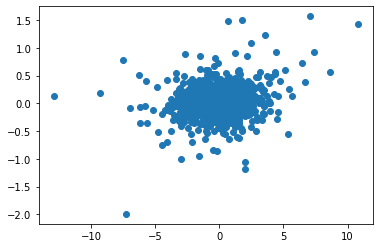

In [ ]:
plt.scatter(Train['spy'], Train['PredictedY'])

In [ ]:
# Model Evaluation
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustedR2 = 1-(1-r2)*(data.shape[0]-1)/(data.shape[0]-model_k-1)
    RMSE=(SSE/(data.shape[0]-model_k-1))**0.5
    return adjustedR2, RMSE

In [ ]:
print('Adjusted R^2 and RMSE on Train:', adjustedMetric(Train, lm, 9, 'spy'))
print('Adjusted R^2 and RMSE on Test:', adjustedMetric(Test, lm, 9, 'spy'))

Adjusted R^2 and RMSE on Train: (0.016697598915469403, 1.3844906422071208)
Adjusted R^2 and RMSE on Test: (0.005337249218174911, 3.2486237347605353)


In [ ]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [ ]:
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.016698,0.005337
RMSE,1.384491,3.248624


# **Evaluate Strategy**

In [ ]:
# Proffit of Signal-based Strategy (Train data)
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy']*Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in train:', Train['Profit'].sum())

Total profit made in train: 175.61968231201172


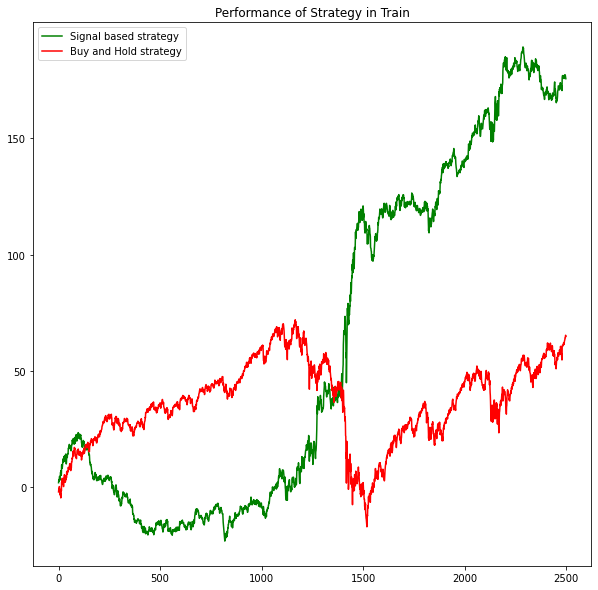

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Profit of Signal-based Strategy (Test data)
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy']*Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test:', Test['Profit'].sum())

Total profit made in Test: -140.53968811035156


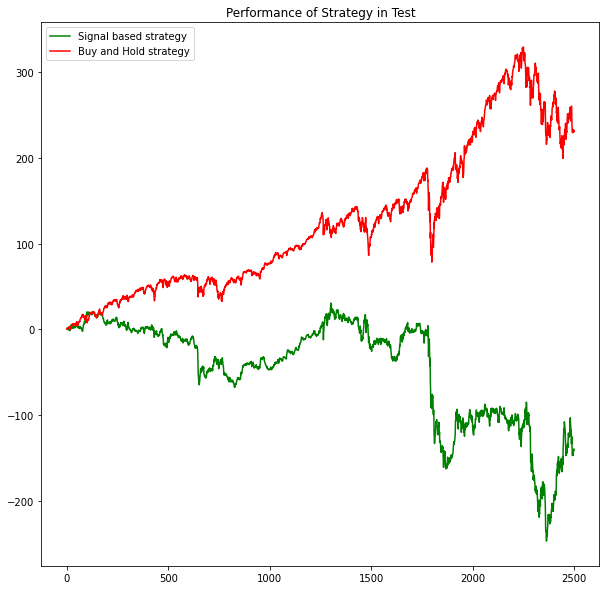

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Sharpe Ratio
# Include the initial investment of SPY
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [ ]:
# Sharpe Ratio on Train Data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('daily sharpe ratio is', dailyr.mean()/dailyr.std(ddof=1))
print('yearly sharpe ratio is', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is 0.039496372036833184
yearly sharpe ratio is 0.6269854685924774


In [ ]:
# Sharpe Ratio on Test Data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('daily sharpe ratio is', dailyr.mean()/dailyr.std(ddof=1))
print('yearly sharpe ratio is', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is -0.009529889510295892
yearly sharpe ratio is -0.15128230599699627


In [ ]:
# Maximum Drawdown on Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak']-Train['Wealth'])/Train['Peak']

In [ ]:
# Maximum Drawdown on Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak']-Test['Wealth'])/Test['Peak']

In [ ]:
print('Maximum drawdown on train is', Train['Drawdown'].max())
print('Maximum drawdown on test is', Test['Drawdown'].max())

Maximum drawdown on train is 0.4299158494183924
Maximum drawdown on test is 1.5385888181694136
